In [1]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

2.2.0
2.3.1


Using TensorFlow backend.


In [15]:
# 2.2.5 + 텐서플로 1.15.0
!pip uninstall keras
!pip uninstall tensorflow

# !pip install keras==2.2.5
# !pip install tensorflow==1.15.0

!pip install keras==2.3.1
!pip install tensorflow==2.2



Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? t
Your response ('t') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
y
y
y
y
  Successfully uninstalled tensorflow-2.3.0

     |████████████████████████████████| 516.2MB 26kB/s 
     |████████████████████████████████| 3.0MB 44.1MB/s 
     |████████████████████████████████| 460kB 51.6MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0


2.3.0
2.4.3


# 합성곱 신경망 (conv2d로 빼고, maxpooling으로 접고)
## 입력 값
- 컨브넷의 입력과 출력은 (h, w, c)크기의 입력텐서를 사용한다

## 특징
1. 학습된 패턴은 평행 이동 불변성(translation invariant)을 가진다.
2. 컨브넷은 패턴의 공간적 계층 구조를 학습할 수 있다.

## 원리
1. 3D 입력 특성 맵 위를 윈도우가 슬라이딩하면서 모든 위치에서 3D 특성 패치(window_height, window_width, output_depth)를 추출한다
2. (height, width, output_depth)가 (output_depth,)로 변환 3D에서 1D로 바뀐다.
  - 원리: 합성곱 커널이라는 하나의 학습된 가중치 행렬과의 **텐서 곱셈**을 통하여 변환된다.

## 핵심 파라미터
- 입력으로부터 뽑아낼 **패치의 크기** (3,3) (5,5)
- 특성 맵의 **출력 깊이 **

## 입력과 출력이 다른 이유
- 경계문제 (padding = same)으로 해결 가능
- 스트라이드의 사용 여부

### 최종 특성맵을 1D로 Flatten으로 펼쳐서 Dense에 연결해야 됨 -> 가중치 파라미터의 적절한 개수 필요 == 다운샘플링 필요(스트라이드, 맥스풀링, 평균풀링)

In [44]:
# 5-1 간단한 컨브넷 만들기

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))        # 출력 깊이, filter_size, activation, input_shape
model.add(layers.MaxPooling2D((2,2))) # 괄호 왜 두번 닫을까 , MaxPooling m이랑 p 대문자 # maxpooling_size 
model.add(layers.Conv2D(64,(3,3),activation='relu'))                                    # 출력 깊이, filter_size, activation
model.add(layers.MaxPooling2D((2,2)))                                                   # maxpooling_size
model.add(layers.Conv2D(64,(3,3),activation='relu'))                                    # 출력 깊이, filter_size, activation, input_shape

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 이전의 (3,3,64) 아웃풋을 1D로 쫙 펼쳐줌
model.add(layers.Flatten()) 
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [48]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# 원래 shape는 (60000,28,28)인데 (60000,28,28,1)로 바꿔줌                  input_shape를 (28,28,1)로 맞췄기 때문
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5,batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1804 - accuracy: 0.9435
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0475 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0329 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0194 - accuracy: 0.9941


In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9918
0.9918000102043152


# 5.2 소규모 데이터셋으로 컨브넷 훈련하기
- 전략 세가지
  1. 처음부터 작은 모델을 훈련하기
  2. 사전 훈련된 모델을 사용하여 특성 추출하기
  3. 사전 훈련된 모델을 세밀하게 튜닝하기


  1. 많은 데이터라는 것은 모델의 크기에 따라 상대적인 것임. 따라서 작은 모델이면 적은 데이터로도 의미있는 학습이 가능
  2. 


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil

original_dataset_dir = '/content/drive/My Drive/Colab Notebooks/DLWP/cats_and_dogs/train'
base_dir = '/content/drive/My Drive/Colab Notebooks/DLWP/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

FileExistsError: ignored

# 런타임 초기화 됐을 때 여기서부터 다시 시작하기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os, shutil
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers

original_dataset_dir = '/content/drive/My Drive/Colab Notebooks/DLWP/cats_and_dogs/train'
base_dir = '/content/drive/My Drive/Colab Notebooks/DLWP/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_dogs_dir = os.path.join(test_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')

In [3]:
# 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
# 5-6 모델의 훈련 설정하기
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
# 5-7 ImageDataGenerator를 사용하여 디렉토리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [8]:
# 5-8 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6911 - acc: 0.5315 - val_loss: 0.6776 - val_acc: 0.5630
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6517 - acc: 0.6330 - val_loss: 0.6709 - val_acc: 0.5610
Epoch 3/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5981 - acc: 0.6825 - val_loss: 0.6124 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5647 - acc: 0.7155 - val_loss: 0.5945 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5374 - acc: 0.7275 - val_loss: 0.6064 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5016 - acc: 0.7465 - val_loss: 0.6473 - val_acc: 0.6610
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.4728 - acc: 0.7690 - val_loss: 0.59

In [9]:
# 5-9 모델 저장하기
model.save('cats_and_dogs_small_1.h5')

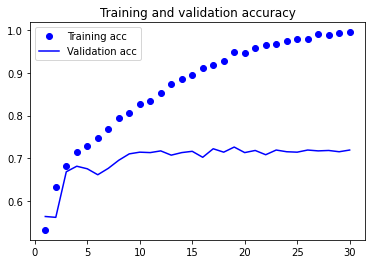

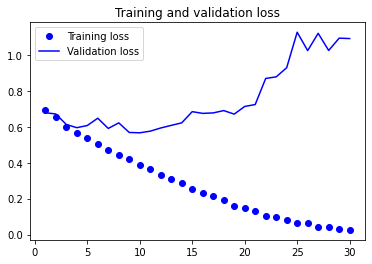

In [10]:
# 5-10 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label = 'Training acc')
plt.plot(epochs, val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
# 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(
    rotation_range=20,                     # 회전시킬 각도
    width_shift_range=0.1,                 # 수평 평행이동 범위
    height_shift_range=0.1,                # 수직 평행이동 범위
    shear_range=0.1,                       # rotation_range로 회전할 때 y축 방향으로 각도를 증가시켜 이미지를 변형 (전단 변환을 적용할 각도 범위)
    zoom_range=0.1,                        # 랜덤으로 확대할 범위
    horizontal_flip=True,                  # 랜덤하게 수평으로 뒤집기
    fill_mode = 'nearest'                  # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략 (nearest: 인접 픽셀 사용)
)

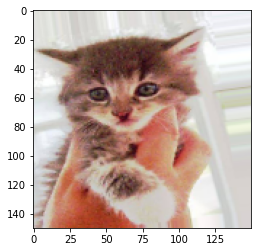

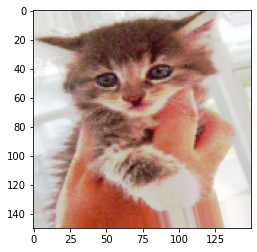

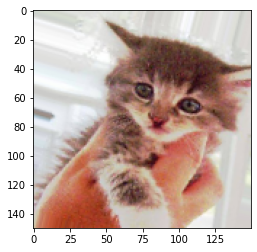

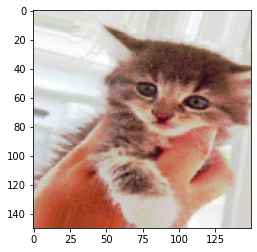

In [7]:
# 5-12 랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for 
                 fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [8]:


# 5-13 드롭아웃을 포함한 새로운 컨브넷 정의하기
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
# 5-14 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6932 - acc: 0.5193 - val_loss: 0.6952 - val_acc: 0.5025
Epoch 2/100
100/100 [==============================] - 30s 296ms/step - loss: 0.6864 - acc: 0.5506 - val_loss: 0.6465 - val_acc: 0.5039
Epoch 3/100
100/100 [==============================] - 29s 295ms/step - loss: 0.6813 - acc: 0.5691 - val_loss: 0.6379 - val_acc: 0.5812
Epoch 4/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6715 - acc: 0.5779 - val_loss: 0.6615 - val_acc: 0.6044
Epoch 5/100
100/100 [==============================] - 28s 285ms/step - loss: 0.6611 - acc: 0.6054 - val_loss: 0.6854 - val_acc: 0.5305
Epoch 6/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6499 - acc: 0.6181 - val_loss: 0.6368 - val_acc: 0.6012
Epoch 7/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6485 - acc: 0.6111 -

# 에러 발생 -> keras와 tensorflow 버전 확인 후 버전 바꾸기
- 텐서플로 버전: 2.2.0
- 케라스 버전: 2.3.1



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - ETA: 9s - loss: 0.6940 - acc: 0.5095WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.


In [10]:
# 5-15 모델 저장하기
model.save('cats_and_dogs_small_2.h5')

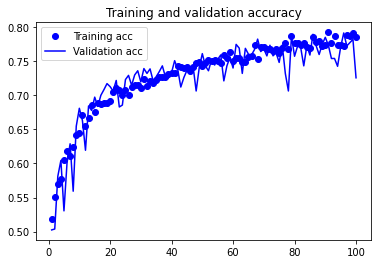

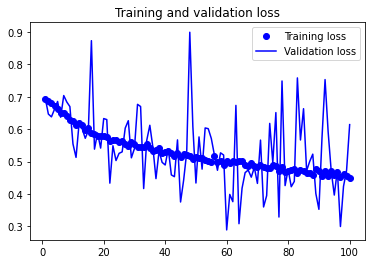

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label = 'Training acc')
plt.plot(epochs, val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 사전 학습된 모델 불러와서 특성만 추출한 뒤 완전 연결층 연걸

In [12]:
# 5-16 VGG15 합성곱 기반 층 만들기
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [13]:
# 5-17 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/My Drive/Colab Notebooks/DLWP/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory,sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1)*batch_size] = features_batch
    labels[i * batch_size : (i+1)*batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [15]:
print(train_features.shape)
print(validation_features.shape)
print(test_features.shape)

(2000, 8192)
(1000, 8192)
(1000, 8192)


In [16]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(2000,)
(1000,)
(1000,)


In [17]:
# 5-18 완전 연결 분류기를 정의하고 훈련하기
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 298us/step - loss: 0.6161 - acc: 0.6590 - val_loss: 0.4461 - val_acc: 0.8190
Epoch 2/30
2000/2000 [==============================] - 1s 260us/step - loss: 0.4342 - acc: 0.7975 - val_loss: 0.3644 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 0s 247us/step - loss: 0.3587 - acc: 0.8495 - val_loss: 0.3418 - val_acc: 0.8420
Epoch 4/30
2000/2000 [==============================] - 0s 246us/step - loss: 0.3174 - acc: 0.8665 - val_loss: 0.3021 - val_acc: 0.8810
Epoch 5/30
2000/2000 [==============================] - 1s 251us/step - loss: 0.2868 - acc: 0.8830 - val_loss: 0.2866 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 0s 243us/step - loss: 0.2662 - acc: 0.8980 - val_loss: 0.2797 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 0s 246us/step - loss: 0.2409 - acc: 0.9060 - val_loss: 0.2708 - val_acc: 0.8880


In [18]:
print(train_features.shape)
print(train_labels.shape)

(2000, 8192)
(2000,)


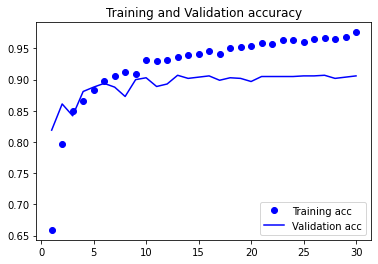

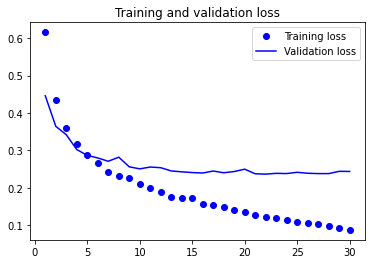

In [19]:
# 5-19 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
# 5-20 합성곱 기반 층 위에 완전 연결 분류기 추가하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [21]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:',
      len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:',
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [22]:
# 5-21 동결된 합성곱 기반 층과 함께 모델을 엔드-투-엔드로 훈련하기
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 21s - loss: 0.5326 - acc: 0.7470 - val_loss: 0.3310 - val_acc: 0.8540
Epoch 2/30
 - 20s - loss: 0.3982 - acc: 0.8405 - val_loss: 0.3646 - val_acc: 0.8850
Epoch 3/30
 - 20s - loss: 0.3509 - acc: 0.8485 - val_loss: 0.5353 - val_acc: 0.8800
Epoch 4/30
 - 20s - loss: 0.3181 - acc: 0.8695 - val_loss: 0.3433 - val_acc: 0.8920
Epoch 5/30
 - 19s - loss: 0.2975 - acc: 0.8845 - val_loss: 0.3752 - val_acc: 0.8930
Epoch 6/30
 - 20s - loss: 0.2912 - acc: 0.8825 - val_loss: 0.2315 - val_acc: 0.8920
Epoch 7/30
 - 19s - loss: 0.2808 - acc: 0.8850 - val_loss: 0.2142 - val_acc: 0.8940
Epoch 8/30
 - 20s - loss: 0.2650 - acc: 0.8930 - val_loss: 0.1047 - val_acc: 0.8960
Epoch 9/30
 - 20s - loss: 0.2567 - acc: 0.9040 - val_loss: 0.1461 - val_acc: 0.8990
Epoch 10/30
 - 20s - loss: 0.2559 - acc: 0.8975 - val_loss: 0.1301 - val_acc: 0.9060
Epoch 11/30
 - 20s - loss: 0.2448 - acc: 0.9005 - val_loss: 0.2859 - val_ac

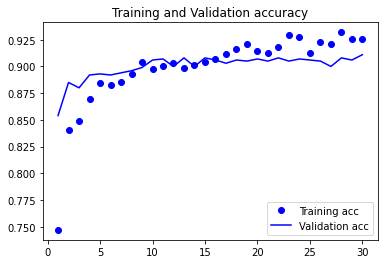

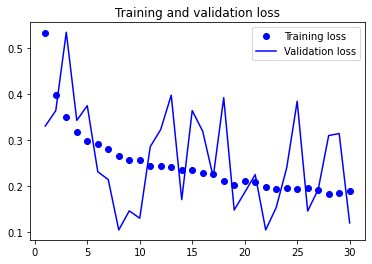

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# 5-22 특정 층까지 모든 층 동결하기

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [25]:
# 5-23
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 23s 228ms/step - loss: 0.2043 - acc: 0.9165 - val_loss: 0.3138 - val_acc: 0.9020
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1597 - acc: 0.9380 - val_loss: 0.2631 - val_acc: 0.9160
Epoch 3/100
100/100 [==============================] - 21s 212ms/step - loss: 0.1483 - acc: 0.9415 - val_loss: 0.0161 - val_acc: 0.9160
Epoch 4/100
100/100 [==============================] - 21s 210ms/step - loss: 0.1279 - acc: 0.9485 - val_loss: 0.0232 - val_acc: 0.9190
Epoch 5/100
100/100 [==============================] - 21s 208ms/step - loss: 0.1088 - acc: 0.9625 - val_loss: 0.2698 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 21s 209ms/step - loss: 0.1008 - acc: 0.9600 - val_loss: 0.0463 - val_acc: 0.9050
Epoch 7/100
100/100 [==============================] - 21s 210ms/step - loss: 0.0913 - acc: 0.9650 - val_loss: 0.2977 - val_acc: 0.9150
Epoch 8/100
100/100 [===========================

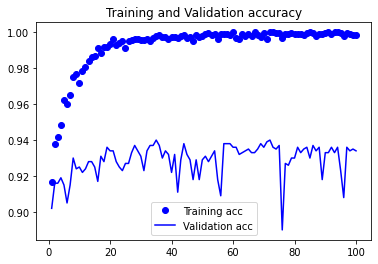

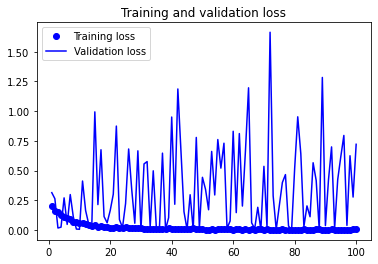

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

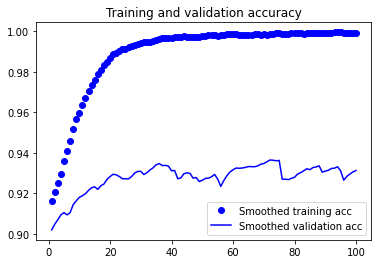

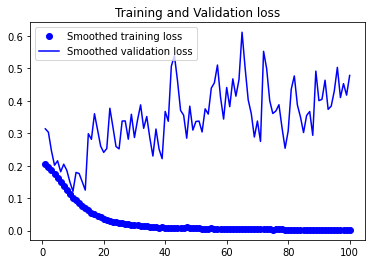

In [27]:
# 5-24 부드러운 그래프 그리기
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point* (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc),'bo',label = 'Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc),'b',label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss),'bo',label ='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss),'b',label='Smoothed validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()